# Clustering


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import seaborn as sns
%matplotlib inline

## Part 1

In [7]:
df = pd.read_csv('age_height_data.csv')
df.head()

,age,height,true_cluster_label
0,37.0,4.961920,0
1,50.0,5.821349,2
2,45.0,5.531872,1
3,39.0,5.116280,0
4,68.0,5.168562,3


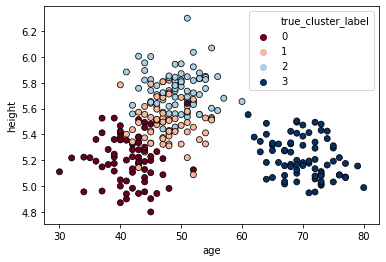

In [8]:
sns.scatterplot(data = df, 
                x = 'age', 
                y = 'height', 
                hue = 'true_cluster_label', 
                palette=plt.cm.RdBu,
                edgecolor = 'k')

## Part 2

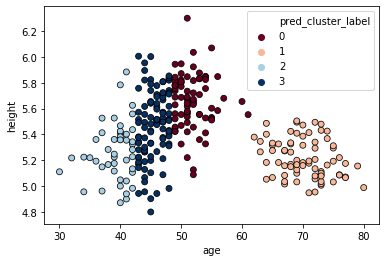

In [9]:
kmn_pipe = Pipeline([
    ('kmeans',KMeans(n_clusters=4))
])


X = df.loc[:,['age','height']].values
kmn_pipe.fit(X)

df['pred_cluster_label'] = kmn_pipe.predict(X)

sns.scatterplot(data = df, 
                x = 'age', 
                y = 'height', 
                hue = 'pred_cluster_label', 
                palette=plt.cm.RdBu,
                edgecolor = 'k')

## Part 3

No, it does not look like the actual cluster labels. K-Means Clustering algorithm uses a distance measure between the instances. So, if the variables used in clustering are of incomparable units (age measured in years [30 80], and height measured in feet [4.75 6.25]),  or the attributes show quite different variances, then we should standardize the data. In our case, the variance of age is much larger than the variance for height and age dominates the clustering.

## Part 4

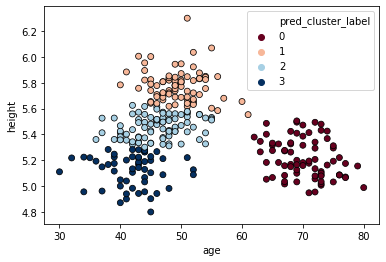

In [10]:
kmn_pipe = Pipeline([
    ('scale', StandardScaler()),
    ('kmeans',KMeans(n_clusters=4))
])

kmn_pipe.fit(X)

df['pred_cluster_label'] = kmn_pipe.predict(X)

sns.scatterplot(data = df, 
                x = 'age', 
                y = 'height', 
                hue = 'pred_cluster_label', 
                palette=plt.cm.RdBu,
                edgecolor = 'k')

## Part 4

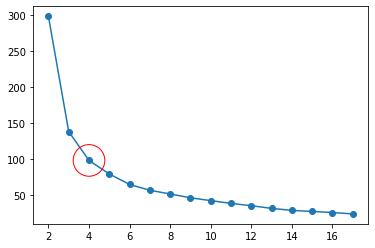

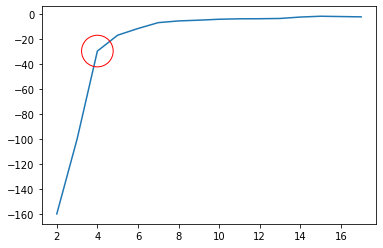

In [11]:
min_clusters = 2
max_clusters = int(np.sqrt(df.shape[0]))

num_clusters = range(min_clusters, max_clusters+1)
scores = []

for clusters in num_clusters:

    kmn_pipe.named_steps['kmeans'].set_params(n_clusters = clusters)
    kmn_pipe.fit(X)
    scores.append(-kmn_pipe.score(X))

fig, ax = plt.subplots()
ax.plot(num_clusters, scores, marker = 'o')
ax.scatter(4, scores[2], facecolor = 'None', edgecolor = 'red', zorder = 3, s = 1000)

fig, ax = plt.subplots()
plt.plot(num_clusters, np.gradient(scores))
ax.scatter(4, np.gradient(scores)[2], facecolor = 'None', edgecolor = 'red', zorder = 3, s = 1000)


## Part 5

In the plot above, the elbow is at k=4, indicating the optimal k for this dataset is 4.

As we saw, this method plots the various values of cost (KMean Score) with changing k. As the number of K increases, there will be fewer elements in the cluster. So average distortion will decrease. The lesser amount of elements means closer to the centroid. So, the improvements will decline, at some point rapidly, creating the elbow shape. Thus for the given data, we conclude that the optimal number of clusters for the data is 4.

## Part 6

1) Based on how the authors discussed in the paper, the basic definition of clustering is partitioning of data into clusters so that similar elements share the same cluster and dissimilar elements are separated into different clusters. This definition can be problematic, which was illustrated in a simple example of a collection of elements scattered next to each other along a long line. If we want to fulfill “every pair of close by elements share the same cluster,” we would put all of those points in a single joint cluster. Nevertheless, such a clustering violates the second requirement - we will end up with dissimilar elements sharing the same cluster. So even this basic example shows the conflict between the two requirements of clustering.

2) Most of the papers talk about run time and giving examples of data sets on which the results were excellent, and they may propose a new algorithmic method. Nevertheless, they rarely try to examine concerning those clustering features their algorithms vary from existing ones, the particular applications for which the proposed algorithm will be more acceptable. Besides, much work is devoted to coming up with efficient approximation algorithms for objective clustering minimization. The author discusses that in most clustering applications, the users do not care about finding such a cost-minimizing solution. They can not even evaluate how close to the minimum possible is the cost of the clustering output by some algorithm. A suitable choice of an algorithm through the right choice of an objective function will usually have a much higher impact on the usability of output clusterings. Not much research is devoted to that algorithmic selection aspect, either.

3) The author believes that most of the clustering users pick the clustering algorithm for their particular data based on ad-hoc reasons. These reasons can be choosing the commonly used algorithm in their area, taking user-friendly and easy to use algorithms, choosing a fast running algorithm, availability of the algorithm in the user statistics package or even choosing the algorithm which does not need to adapt to any sensitive parameters, and so on. The author probes the way many users select their clustering tool because it is not much thought. They need to pay more attention to their specific tasks and their requirements.

4) As mentioned in the paper, for clustering, different algorithms yield different outcomes. The choice of a clustering algorithm, and their parameters, like the number of clusters, play a crucial role in the usefulness of the output clustering solution. So as a practitioner, first, we should examine the clustering task thoroughly and find out about our task's requirements. Based on that, we would decide on the proper clustering tools. Because as we know, different clustering applications call for different prioritization. Some conventional clustering approaches emphasize different requirements. Also, we need to understand the features of each clustering algorithm and consider the effect of picking appropriate parameter values for the chosen algorithms.